In [75]:
using LinearAlgebra
using IterativeSolvers
using Plots

In [37]:
function Sele(m::Int, n::Int)
    if mod(m + n, 2) != 0
        return 0.0
    end
    res = 2/(m+n+5) - 4/(m+n+3) + 2/(m+n+1)
    res
end
S_mat(m, n) = [Sele(i,j) for i = 0:m-1, j = 0:n-1]

S_mat (generic function with 1 method)

In [38]:
function Hele(m::Int, n::Int)
    if mod(m + n, 2) != 0
        return 0.0
    end
    res = -8 * (1-m-n-2*m*n)/((m+n+3) * (m+n+1) * (m+n-1))
    res
end
H_mat(m, n) = [Hele(i,j) for i = 0:m-1, j = 0:n-1]

H_mat (generic function with 1 method)

In [52]:
n = 10
S = S_mat(n, n)
H = H_mat(n, n);

In [53]:
M = Matrix{Float64}(inv(S) * H)
sort(eigvals(M))

10-element Array{Float64,1}:
   2.4674011002722196
   9.869604401094545 
  22.206612344231175 
  39.478504589336616 
  61.76067928956643  
  89.16437778468615  
 132.9179638999736   
 181.68712260384208  
 463.1473433601824   
 642.3003906571399   

In [54]:
res = lobpcg(H, S, false, 5)

Results of LOBPCG Algorithm
 * Algorithm: LOBPCG - CholQR
 * λ: [2.46740110011638,9.869604390725689, ...]
 * Residual norm(s): [1.222064847695074e-9,1.992802076932192e-8, ...]
 * Convergence
   * Iterations: 2
   * Converged: true
   * Iterations limit: 200


In [92]:
X = res.X[:, 1]

10-element Array{Float64,1}:
  1.0000000007061218   
  9.625859960504801e-8 
 -0.2337005723982192   
 -1.6317926763154134e-6
  0.019969024799664947 
  7.180073535922871e-6 
 -0.0008943629835712341
 -1.1401358832846542e-5
  2.409910782397162e-5 
  5.919971830612575e-6 

In [96]:
function ψ(x, C)
    res = 0.0
    f(y, n) = y^n * (y-1) * (y+1)
    for (i, c) in enumerate(C)
        res += c * f(x, i-1)
    end
    res
end

ψ (generic function with 2 methods)

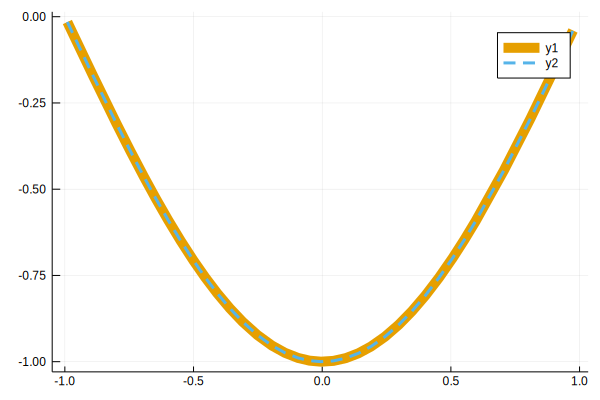

In [117]:
plot(x -> ψ(x, res.X[:, 1]), -1.0, 1.0, w=10)
plot!(x -> -cos(π/2 * x), -1.0, 1.0, line=(:dash, 3))

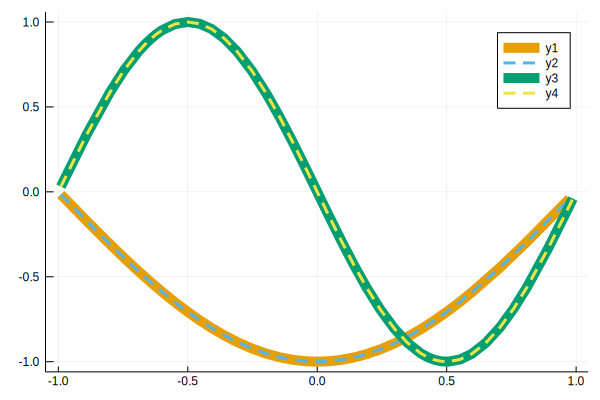

In [118]:
plot!(x -> ψ(x, res.X[:, 2]), -1.0, 1.0, w=10)
plot!(x -> -sin(2*π/2 * x), -1.0, 1.0, line=(:dash, 3))
# plot!(x -> ψ(x, res.X[:, 3]), -1.0, 1.0)
# plot!(x -> ψ(x, res.X[:, 4]), -1.0, 1.0)

In [167]:
α = [13.00771, 1.962079, 0.444529, 0.1219492]
S = [(π/(α[i]+α[j]))^(3/2) for i = 1:4, j = 1:4]
T = [3*(α[i]*α[j]*π^(3/2))/((α[i]+α[j])^(5/2)) for i = 1:4, j = 1:4]
A = [-2π/(α[i]+α[j]) for i = 1:4, j = 1:4]
H = T + A

4×4 Array{Float64,2}:
  0.577269    0.0720028  -0.321541   -0.436127
  0.0720028   0.50705    -0.989185   -2.37742 
 -0.321541   -0.989185   -2.63808    -7.34222 
 -0.436127   -2.37742    -7.34222   -17.3052  

In [177]:
M = Matrix{Float64}(inv(S) * H)
energy = eigmin(M)
C = eigvecs(M)[:, 4]
eigvals(M)

4-element Array{Float64,1}:
 21.144341163161865  
  2.592299567507627  
  0.11321391439698683
 -0.49927840566682546

In [178]:
eigvecs(M)

4×4 Array{Float64,2}:
  0.97965      0.00557882   0.214713  0.349323
 -0.197392    -0.939391     0.146186  0.592557
  0.0360359    0.338738     0.891928  0.674597
 -0.00489895  -0.0526385   -0.370125  0.267898

In [179]:
function ψ(r)
    res = 0.0
    for (i, c) in enumerate(C)
        res += exp(-α[i]*r^2) * c
    end
    res
end

ψ (generic function with 2 methods)

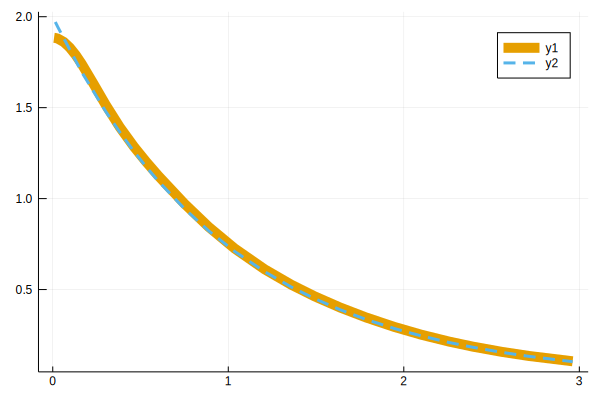

In [181]:
plot(ψ, 0.0, 3, w=10)
plot!(r -> 2 * exp(-r), 0.0, 3, line=(:dash, 3))